# Rules
* Internet and Books are ALLOWED
* Name your file as following: StudentID_ChineseName/EnglishName_quiz#
* Extension of your file or your file type should be .py

# Logistic regression
- Using logistic regression predicting on MNIST database with multiple classes.

## Part I

Use the MNIST data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554)

Split into training and test with sklearn

-Training dataset(60000,784) . Test dataset(10000,784)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,test_size=1/7, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


Use logistic model from sklearn. 
* Set the max_iteration to 1000.
* Set n_jobs to 5.

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, n_jobs=5)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=5)

Predict the model using test data. Check the accuracy by comparing the prediction with the label. **Remember to use test data, not train data!!**
The result can be in **the scale of 0 to 1** or **percentage (%)**.

In [7]:
score = clf.score(X_test, y_test)
print(score)

0.9123


Show the confusion matrix. Check **metrics from sklearn** for confusion matrix!

In [8]:
from sklearn import metrics
predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, y_pred = predictions, labels = clf.classes_)
cm

array([[ 961,    0,    3,    1,    3,    8,   10,    3,    6,    1],
       [   0, 1106,    7,    3,    1,    5,    2,    3,   11,    3],
       [   9,   17,  920,   19,   15,    3,   14,   10,   30,    3],
       [   2,    4,   34,  893,    1,   26,    1,   10,   29,   13],
       [   3,    2,    5,    2,  889,    1,    9,   11,    7,   33],
       [  13,    2,    9,   29,   10,  736,   18,    4,   31,   11],
       [  11,    2,    9,    0,   11,   17,  933,    1,    4,    1],
       [   4,    5,   17,    7,   11,    2,    1,  969,    6,   42],
       [   6,   15,    8,   23,    6,   25,   10,    4,  852,   14],
       [   5,    5,    4,   10,   31,    8,    1,   32,    9,  864]])

Using seaborn to visualize the confusion matrix

Text(0.5, 1.0, 'Accuracy Score: 0.9123')

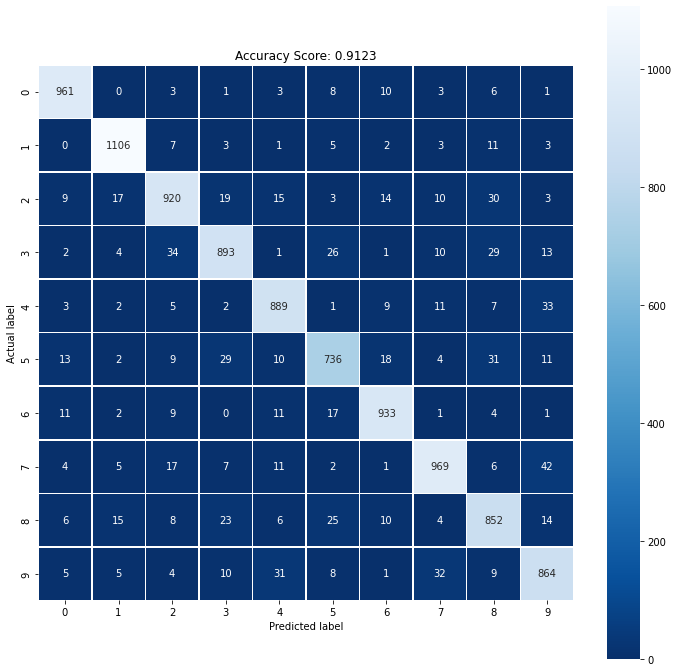

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title)